# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [89]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import MarkerCluster

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [52]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [53]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

In [55]:
data['pages']

32

Можем посмотреть на краткое описание первой вакансии

In [4]:
data['items'][0]

{'id': '88054843',
 'premium': False,
 'name': 'Аналитик данных / Data scientist, удаленно',
 'department': {'id': '816144-816144-office', 'name': 'ВкусВилл. Офис'},
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-10-11T16:18:24+0300',
 'created_at': '2023-10-11T16:18:24+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=88054843',
 'branding': {'type': 'MAKEUP', 'tariff': None},
 'show_logo_in_search': True,
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/88054843?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/88054843',
 'relations': [],
 'employer': {'id': '816144',
  'name': 'ВкусВилл',
  'url': 'https://api.hh.ru/employers/816144',
  'alternate_url': 'https://hh.ru/emplo

Сколько всего найдено вакансий

In [5]:
data['found']

316

Количество страниц в результатах поиска

In [6]:
data['pages']

32

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [7]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,published_at,...,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro
0,88054843,False,"Аналитик данных / Data scientist, удаленно",False,False,None,NaN,None,None,2023-10-11T16:18:24+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,88168141,False,Junior Data Scientist,False,False,None,NaN,None,None,2023-10-13T17:08:24+0300,...,"Москва, 3-я Рыбинская улица, 18с22",Сокольники,Сокольническая,1.134,1,55.789282,37.679895,"[{'station_name': 'Сокольники', 'line_name': '...",918565,NaN
2,85602965,False,Data Scientist,False,False,None,NaN,None,None,2023-09-21T21:04:50+0300,...,"Москва, Западный административный округ, Можай...",NaN,NaN,NaN,NaN,NaN,NaN,[],11341108,NaN
3,88087751,False,Compliance Director Russia,False,False,None,NaN,None,None,2023-10-12T11:25:43+0300,...,"Москва, Ленинградское шоссе, 16ас1",Войковская,Замоскворецкая,2.30,2,55.818923,37.497791,"[{'station_name': 'Войковская', 'line_name': '...",147118,NaN
4,87855182,False,Data Scientist ML (с элементами NLP),False,False,None,NaN,None,None,2023-10-06T17:12:14+0300,...,"Москва, Поклонная улица, 3",Кутузовская,Филевская,4.73,4,55.740544,37.534100,"[{'station_name': 'Кутузовская', 'line_name': ...",12857772,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [8]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [ ]:
vacancy_info

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.

#### Анализ вакансии Data Scientist.

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [2]:
def get_vacancies_i_page(page_number=0) -> (pd.DataFrame, int):
    '''
    Возвращает вакансии с определённой страницы поиска, а также количество страниц всего
    '''
    
    URL = 'https://api.hh.ru/vacancies'
    params = {
        'text': "(data scientist) OR (аналитик данных) OR (data analyst)",  # язык поисковых запросов: https://hh.ru/article/1175
        'area': 1,  # id региона Москва
        'page': page_number,
        'per_page': 100  # максимум на страницу
    }
    
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    page_count = data['pages']
    vacancies = pd.json_normalize(data['items'])
    sleep(0.5)
    
    return vacancies, page_count

In [3]:
_, page_count = get_vacancies_i_page()

vacancies_df_list = []
for i in range(page_count):
    vacancies, _ = get_vacancies_i_page(page_number=i)
    vacancies_df_list.append(vacancies)

all_vacancies = pd.concat(vacancies_df_list,  ignore_index=True)

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [4]:
all_vacancies.drop_duplicates(subset='id', inplace=True, ignore_index=True)

In [5]:
all_vacancies.head()

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,insider_interview.id,insider_interview.url
0,88044631,False,Java-разработчик,NaN,False,False,NaN,None,None,2023-10-11T14:11:27+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,87879879,False,CEO,NaN,False,False,NaN,None,None,2023-10-11T23:40:10+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,88168559,False,Руководитель направления,NaN,False,False,NaN,None,None,2023-10-13T19:24:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87215623,False,Руководитель отдела продаж,NaN,False,False,NaN,None,None,2023-09-22T15:43:31+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87681894,False,Бухгалтер,NaN,False,False,NaN,None,None,2023-10-03T16:39:08+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [6]:
def get_vacancy_info(vacancy_id):
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy_id}'
    
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    sleep(0.5)
    
    return vacancy_info

In [7]:
vacancy_count = all_vacancies.shape[0]

vacancies_list = []
for i in range(vacancy_count):
    vacancy_id = all_vacancies['id'].iloc[i]
    vacancy_info = get_vacancy_info(vacancy_id)
    vacancies_list.append(vacancy_info)

vacancies_info_df = pd.DataFrame(vacancies_list)
vacancies_info_df.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,88044631,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Java-разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 80000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/88044631,[],[],[],False,[]
1,87879879,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],CEO,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 300000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/87879879,[],[],[],False,[]
2,88168559,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Руководитель направления,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/88168559,[],[],[],False,[]
3,87215623,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Руководитель отдела продаж,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/87215623,[],[],[],False,[]
4,87681894,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Бухгалтер,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/87681894,[],[],[],False,[]


In [ ]:
vacancies_info_df.to_excel('2023_10_14_vacancies_data_science_and_analyst.xlsx', sheet_name='vacancies', index=False)

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [ ]:
vacancies_info_df = pd.read_excel('2023_10_14_vacancies_data_science_and_analyst.xlsx')

In [254]:
vacancies_cnt = len(vacancies_info_df)
vacancies_cnt

1996

**Ответ**: по моему запросу сейчас доступно 1996 вакансий.

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Найдём колонки, в которых указаны навыки. Рассмотрим сначала все названия столбцов:

In [255]:
vacancies_info_df.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages'],
      dtype='object')

Посмотрим содержимое возможно подходящих столбцов:

In [256]:
vacancies_info_df[["key_skills", 'specializations', 'professional_roles']].head()

,key_skills,specializations,professional_roles
0,"[{'name': 'Java'}, {'name': 'JavaScript'}, {'n...",[],"[{'id': '96', 'name': 'Программист, разработчи..."
1,[],[],"[{'id': '18', 'name': 'Бухгалтер'}]"
2,[],[],"[{'id': '73', 'name': 'Менеджер продукта'}]"
3,"[{'name': 'Управление продажами'}, {'name': 'Р...",[],"[{'id': '106', 'name': 'Руководитель отдела пр..."
4,[],[],"[{'id': '26', 'name': 'Генеральный директор, и..."


In [257]:
type(vacancies_info_df.iloc[0]['specializations'])

str

In [259]:
vacancies_info_df[vacancies_info_df['specializations'].apply(lambda x: x != '[]')]['specializations'].head()

Series([], Name: specializations, dtype: object)

В колонке ```specializations``` содержатся только пустые списки. Посмотрим на формат хранения колонки ```key_skills```:

In [260]:
vacancies_info_df['key_skills'][0]

"[{'name': 'Java'}, {'name': 'JavaScript'}, {'name': 'REST'}, {'name': 'Docker'}, {'name': 'API'}, {'name': 'Hibernate ORM'}, {'name': 'Apache Maven'}, {'name': 'PostgreSQL'}, {'name': 'JUnit'}, {'name': 'Kafka'}, {'name': 'Linux'}, {'name': 'Git'}, {'name': 'Английский язык'}, {'name': 'Atlassian Jira'}, {'name': 'Apache Tomcat'}, {'name': 'Lombok'}, {'name': 'Redis'}, {'name': 'Agile'}]"

Подсчитаем сколько раз встречается каждый навык и выберем из них топ-15:

In [263]:
skill_count_dict = {}
for key_skills in vacancies_info_df['key_skills']:
    for skill in json.loads(key_skills.replace('\'', '\"')):
        skill_name = skill['name']
        skill_count_dict[skill_name] = skill_count_dict.get(skill_name, 0) + 1


skill_count_df = pd.DataFrame(
        skill_count_dict.items(),
        columns=['skill', 'count']
    ).set_index('skill')

skill_count_df["percent"] = round(skill_count_df['count'] * 100 / vacancies_cnt, 2)
top15_skills = skill_count_df.sort_values(by='percent', ascending=False).reset_index().head(15)

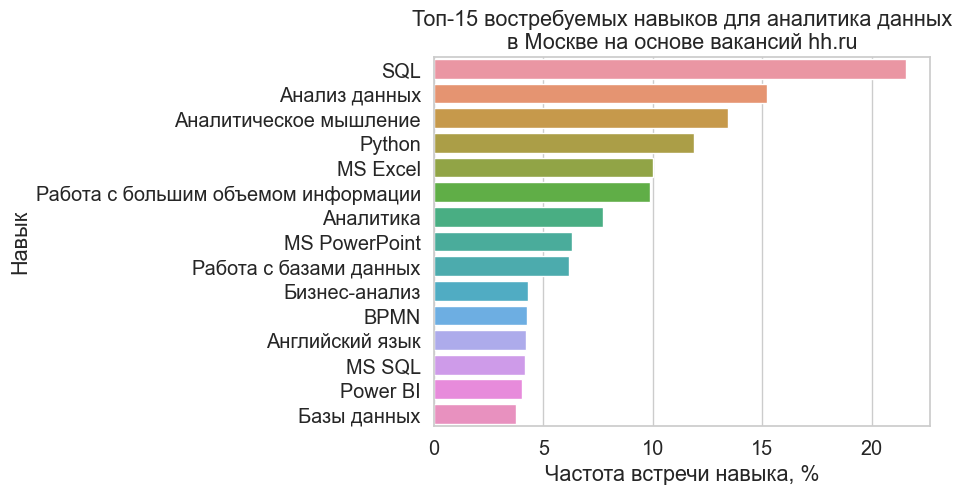

In [264]:
skills_barplot = sns.barplot(top15_skills, x='percent', y='skill', orient='h')
skills_barplot.set(xlabel='Частота встречи навыка, %', ylabel='Навык', title='Топ-15 востребуемых навыков для аналитика данных\nв Москве на основе вакансий hh.ru')
plt.show()

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Посмотрим хранение данных поле ```salary```:

In [265]:
vacancies_info_df['salary'][0]

"{'from': None, 'to': 80000, 'currency': 'RUR', 'gross': False}"

In [283]:
type(vacancies_info_df['salary'][0])

'{"from": None, "to": 80000, "currency": "RUR", "gross": False}'

Здесь указаны вилка зарплаты, валюта и информация об учёте НДФЛ. Приведем информацию о ЗП в более удобный для работы вид

In [311]:
data = vacancies_info_df['salary'].str.replace('\'', '\"')
data = data.str.replace('None', 'null')
data = data.str.replace('False', 'false')
data = data.str.replace('True', 'true')

salary_df = pd.DataFrame(data[data != ''].dropna().apply(json.loads).to_list()).set_axis(
    ['from_sal', 'to_sal', 'currency', 'gross'], 
    axis=1
)
salary_df.head()

,from_sal,to_sal,currency,gross
0,NaN,80000.0,RUR,False
1,150000.0,NaN,RUR,False
2,300000.0,NaN,RUR,True
3,300000.0,NaN,RUR,True
4,60000.0,65000.0,RUR,False


Посмотрим, какие валюты представлены:

In [312]:
salary_df['currency'].unique()

array(['RUR', 'USD', 'EUR'], dtype=object)

Если в вилке указана только одна граница, то возьмем её в качестве ЗП. Если присутствуют обе границы, то возьмем середину. Напишем отдеьную функцию для расчета реальной ЗП с учетом НДФЛ.

In [201]:
def real_salary(from_sal, to_sal, currency, gross):

    # Расчитаем приблизитеьное значение ЗП
    if np.isnan(from_sal):
        salary = to_sal
    elif np.isnan(to_sal):
        salary = from_sal
    else:
        salary = (to_sal + from_sal) / 2

    # Переведём в рубли (на момент 14.10.2023)
    if currency == 'USD':
        salary *= 97.7
    elif currency == 'EUR':
        salary *= 102.71

    # Теперь учет НДФЛ
    if gross is False:
        return salary  # не облагается
        
    year_salary = salary * 12
    
    if year_salary >= 1917000:
        return round(salary * 0.849, 0)  # НДФЛ 15.1%

    return round(salary * 0.87, 0)  # НДФЛ 13%

In [313]:
salary_df['approximate_salary'] = salary_df.apply(
    lambda x: real_salary(x.from_sal, x.to_sal, x.currency, x.gross),
    axis=1
)

salary_df.head()

,from_sal,to_sal,currency,gross,approximate_salary
0,NaN,80000.0,RUR,False,80000.0
1,150000.0,NaN,RUR,False,150000.0
2,300000.0,NaN,RUR,True,254700.0
3,300000.0,NaN,RUR,True,254700.0
4,60000.0,65000.0,RUR,False,62500.0


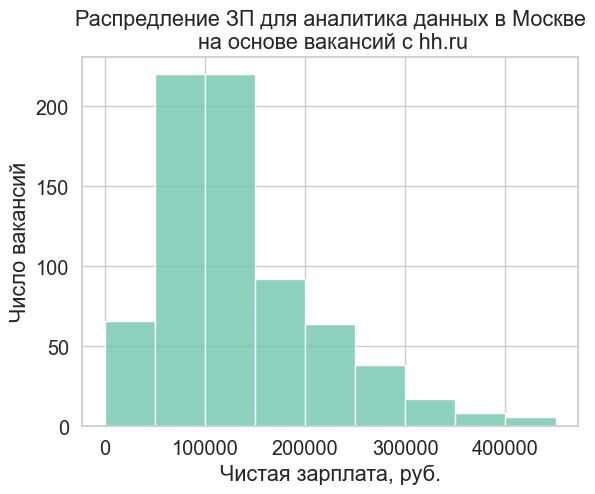

In [314]:
salary_hist = sns.histplot(salary_df['approximate_salary'], binrange=(0, 450000), bins=9)
salary_hist.set(xlabel='Чистая зарплата, руб.', ylabel='Число вакансий', title='Распредление ЗП для аналитика данных в Москве\n на основе вакансий с hh.ru')
plt.show()

**Выводы:**
* На момент 14 октября 2023 года на сайте hh.ru представлено около 2 000 вакансий, связанных с анализом данных и Data Science.
* Самый вострбованных навык для этой специальности - знание SQL. Его можно встретить в каждой 5 вакансии. Также среди частых запрашиваемых умений можно встретить програмиирование на Python, MS Excel, склонность к аналитическому мышлению и способность к работе с большими данными.
* В среднем аналитик данных имеет чистую ЗП в 100 000 рублей, с возможностью роста до 400 000.

#### Анализ вакансии Дизайнер интерьеров.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Парсим данные с сайта:

In [225]:
def get_vacancies_i_page(page_number=0) -> (pd.DataFrame, int):
    '''
    Возвращает вакансии с определённой страницы поиска, а также количество страниц всего
    '''
    
    URL = 'https://api.hh.ru/vacancies'
    params = {
        'text': "(дизайнер интерьеров) OR (дизайн интерьеров) OR (interior designer)",  # язык поисковых запросов: https://hh.ru/article/1175
        'area': 1,  # id региона Москва
        'page': page_number,
        'per_page': 100  # максимум на страницу
    }
    
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    page_count = data['pages']
    vacancies = pd.json_normalize(data['items'])
    sleep(0.5)
    
    return vacancies, page_count

In [226]:
_, page_count = get_vacancies_i_page()

vacancies_df_list = []
for i in range(page_count):
    vacancies, _ = get_vacancies_i_page(page_number=i)
    vacancies_df_list.append(vacancies)

all_vacancies = pd.concat(vacancies_df_list,  ignore_index=True)

Удаляем дубликаты.

In [228]:
all_vacancies.drop_duplicates(subset='id', inplace=True, ignore_index=True)

In [229]:
all_vacancies.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address,address.metro,employer.logo_urls,salary,branding.type,branding.tariff,department.id,department.name,insider_interview.id,insider_interview.url
0,88003647,False,Ассистент дизайнера в студию дизайна интерьера,None,False,True,None,None,2023-10-10T18:58:15+0300,2023-10-10T18:58:15+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83267945,False,Комплектатор интерьеров внутренняя отделка,None,False,False,None,None,2023-09-25T10:57:49+0300,2023-09-25T10:57:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87492774,False,Ассистент отдела маркетинга,None,False,False,None,None,2023-09-28T17:14:41+0300,2023-09-28T17:14:41+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87906343,False,Менеджер по продажам в студию света,None,False,False,None,None,2023-10-09T11:16:54+0300,2023-10-09T11:16:54+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86911764,False,Координатор проекта в Арт- галерее,None,False,False,None,None,2023-09-19T12:27:07+0300,2023-09-19T12:27:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Загружаем подробное описание каждой вакансии.

In [231]:
vacancy_count = all_vacancies.shape[0]

vacancies_list = []
for i in range(vacancy_count):
    vacancy_id = all_vacancies['id'].iloc[i]
    vacancy_info = get_vacancy_info(vacancy_id)
    vacancies_list.append(vacancy_info)

vacancies_info_df = pd.DataFrame(vacancies_list)
vacancies_info_df.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,88003647,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Ассистент дизайнера в студию дизайна интерьера,None,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 40000, 'to': 60000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/88003647,[],[],[],False,[]
1,83267945,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Комплектатор интерьеров внутренняя отделка,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 120000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/83267945,[],[],[],False,[]
2,87492774,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Ассистент отдела маркетинга,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': 70000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/87492774,[],[],[],False,"[{'id': 'eng', 'name': 'Английский', 'level': ..."
3,87906343,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Менеджер по продажам в студию света,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 70000, 'to': 200000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/87906343,[],[],[],False,[]
4,86911764,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Координатор проекта в Арт- галерее,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 65000, 'to': 85000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/86911764,[],[],[],False,[]


In [237]:
vacancies_info_df.to_excel('2023_10_14_vacancies_interior_designer.xlsx', sheet_name='vacancies', index=False)

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [233]:
vacancies_cnt = len(vacancies_info_df)
vacancies_cnt

1190

**Ответ:** по моему запросу сейчас доступно 1190 вакансий.

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Подсчитаем сколько раз встречается каждый навык и выберем из них топ-15:

In [234]:
skill_count_dict = {}
for key_skills in vacancies_info_df['key_skills']:
    for skill in key_skills:
        skill_name = skill['name']
        skill_count_dict[skill_name] = skill_count_dict.get(skill_name, 0) + 1


skill_count_df = pd.DataFrame(
        skill_count_dict.items(),
        columns=['skill', 'count']
    ).set_index('skill')

skill_count_df["percent"] = round(skill_count_df['count'] * 100 / vacancies_cnt, 2)
top15_skills = skill_count_df.sort_values(by='percent', ascending=False).reset_index().head(15)

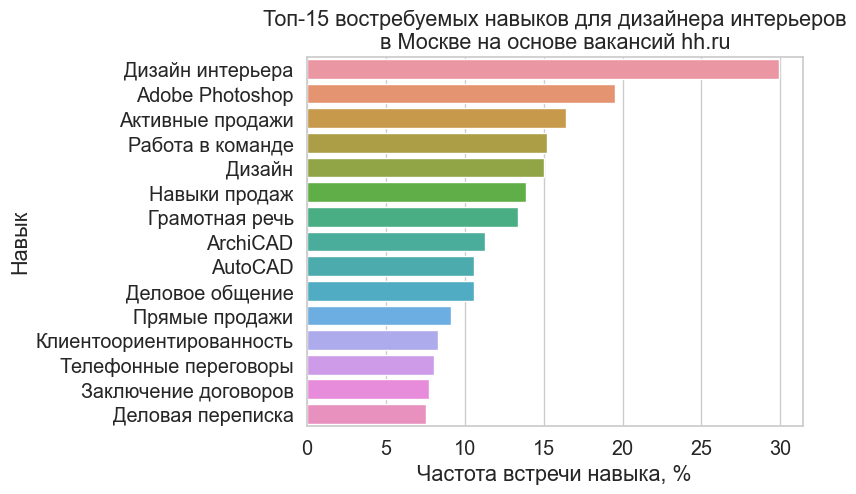

In [243]:
skills_barplot = sns.barplot(top15_skills, x='percent', y='skill', orient='h')
skills_barplot.set(xlabel='Частота встречи навыка, %', ylabel='Навык', title='Топ-15 востребуемых навыков для дизайнера интерьеров\nв Москве на основе вакансий hh.ru')
plt.show()

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Приведем информацию о ЗП в более удобный для работы вид:

In [239]:
salary_df = pd.DataFrame(vacancies_info_df['salary'].dropna().to_list()).set_axis(
    ['from_sal', 'to_sal', 'currency', 'gross'], 
    axis=1
)
salary_df.head()

,from_sal,to_sal,currency,gross
0,40000.0,60000.0,RUR,False
1,120000.0,NaN,RUR,False
2,50000.0,70000.0,RUR,False
3,70000.0,200000.0,RUR,False
4,65000.0,85000.0,RUR,False


Посмотрим в каких валютах выдаётся ЗП:

In [240]:
salary_df['currency'].unique()

array(['RUR', 'USD', 'EUR'], dtype=object)

Расчитаем примерную чистую ЗП:

In [241]:
salary_df['approximate_salary'] = salary_df.apply(
    lambda x: real_salary(x.from_sal, x.to_sal, x.currency, x.gross),
    axis=1
)

salary_df.head()

,from_sal,to_sal,currency,gross,approximate_salary
0,40000.0,60000.0,RUR,False,50000.0
1,120000.0,NaN,RUR,False,120000.0
2,50000.0,70000.0,RUR,False,60000.0
3,70000.0,200000.0,RUR,False,135000.0
4,65000.0,85000.0,RUR,False,75000.0


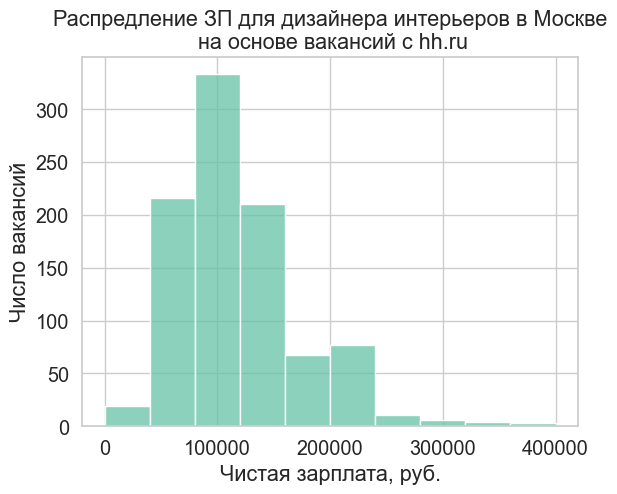

In [250]:
salary_hist = sns.histplot(salary_df['approximate_salary'], binrange=(0, 400000), bins=10)
salary_hist.set(xlabel='Чистая зарплата, руб.', ylabel='Число вакансий', title='Распредление ЗП для дизайнера интерьеров в Москве\n на основе вакансий с hh.ru')
plt.show()

**Выводы:**
* На момент 14 октября 2023 года на сайте hh.ru представлено более 1 000 вакансий, связанных с дизайном интерьеров.
* Самый вострбованных навык для этой специальности - дизайн. Его можно встретить в каждой 3 вакансии. Также выжным навыками являются использование различных программ, таких как Photoshop и AutoCad. Также анализ показывает, что должны быть развиты различные умения коммуникации (возможно в анализе был плохо проведен начальный отбор данных, так как отдельные навыки, по моему мнению, не присущи дизайнеру интерьера).
* В среднем дизайнер интерьеров имеет чистую ЗП в 100 000 рублей, со стабильным ростом до 250 000.

#### Анализ вакансии ux исследователь.

Ещё один доп анализ для друга =)

Снова парсим данные:

In [315]:
def get_vacancies_i_page(page_number=0) -> (pd.DataFrame, int):
    '''
    Возвращает вакансии с определённой страницы поиска, а также количество страниц всего
    '''
    
    URL = 'https://api.hh.ru/vacancies'
    params = {
        'text': "(ux исследователь) OR (ux-исследователь)",  # язык поисковых запросов: https://hh.ru/article/1175
        'area': 1,  # id региона Москва
        'page': page_number,
        'per_page': 100  # максимум на страницу
    }
    
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    page_count = data['pages']
    vacancies = pd.json_normalize(data['items'])
    sleep(0.5)
    
    return vacancies, page_count

In [316]:
_, page_count = get_vacancies_i_page()

vacancies_df_list = []
for i in range(page_count):
    vacancies, _ = get_vacancies_i_page(page_number=i)
    vacancies_df_list.append(vacancies)

all_vacancies = pd.concat(vacancies_df_list,  ignore_index=True)

In [318]:
all_vacancies.drop_duplicates(subset='id', inplace=True, ignore_index=True)

In [319]:
vacancy_count = all_vacancies.shape[0]

vacancies_list = []
for i in range(vacancy_count):
    vacancy_id = all_vacancies['id'].iloc[i]
    vacancy_info = get_vacancy_info(vacancy_id)
    vacancies_list.append(vacancy_info)

vacancies_info_df = pd.DataFrame(vacancies_list)
vacancies_info_df.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,88019282,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Junior front-end разработчик (JavaScript),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 600, 'to': 900, 'currency': 'USD', 'g...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/88019282,[],[],[],False,"[{'id': 'eng', 'name': 'Английский', 'level': ..."
1,88148478,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Product/UX/UI designer,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 1300, 'to': 2100, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/88148478,[],[],[],False,"[{'id': 'eng', 'name': 'Английский', 'level': ..."
2,77772799,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Product designer,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/77772799,[],[],[],False,[]
3,87007567,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Стажер UX-исследователь,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/87007567,[],[],[],False,[]
4,85305252,False,"{'id': 'standard', 'name': 'Стандарт'}",[],UX-исследователь (стажер),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/85305252,[],[],[],False,[]


In [320]:
vacancies_info_df.to_excel('2023_10_14_ux_researcher.xlsx', sheet_name='vacancies', index=False)

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [321]:
vacancies_cnt = len(vacancies_info_df)
vacancies_cnt

147

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [322]:
skill_count_dict = {}
for key_skills in vacancies_info_df['key_skills']:
    for skill in key_skills:
        skill_name = skill['name']
        skill_count_dict[skill_name] = skill_count_dict.get(skill_name, 0) + 1


skill_count_df = pd.DataFrame(
        skill_count_dict.items(),
        columns=['skill', 'count']
    ).set_index('skill')

skill_count_df["percent"] = round(skill_count_df['count'] * 100 / vacancies_cnt, 2)
top15_skills = skill_count_df.sort_values(by='percent', ascending=False).reset_index().head(15)

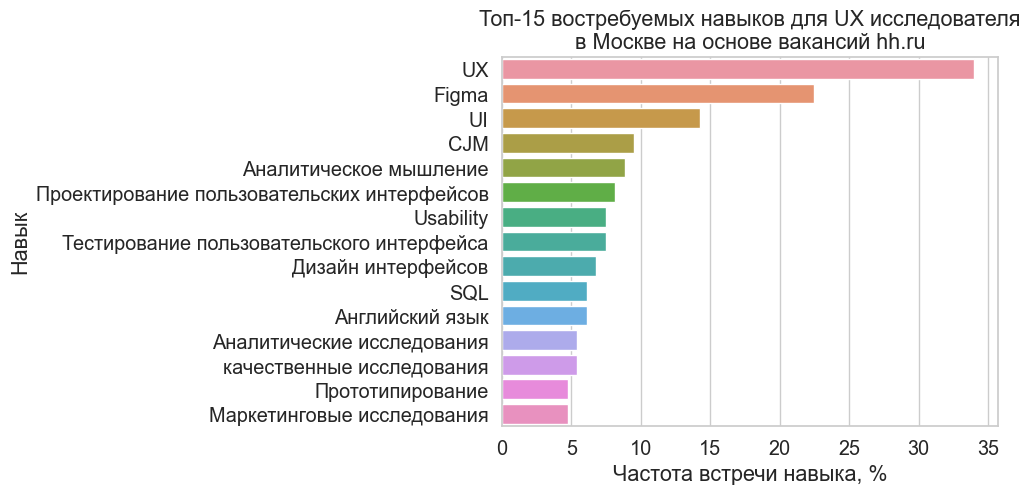

In [344]:
skills_barplot = sns.barplot(top15_skills, x='percent', y='skill', orient='h')
skills_barplot.set(xlabel='Частота встречи навыка, %', ylabel='Навык', title='Топ-15 востребуемых навыков для UX исследователя\nв Москве на основе вакансий hh.ru')
plt.show()

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Приведем информацию о ЗП в более удобный для работы вид:

In [327]:
salary_df = pd.DataFrame(vacancies_info_df['salary'].dropna().to_list()).set_axis(
    ['from_sal', 'to_sal', 'currency', 'gross'], 
    axis=1
)
salary_df.head()

,from_sal,to_sal,currency,gross
0,600.0,900.0,USD,False
1,1300.0,2100.0,USD,False
2,15000.0,NaN,RUR,False
3,NaN,260000.0,RUR,False
4,150000.0,NaN,RUR,False


In [328]:
salary_df['approximate_salary'] = salary_df.apply(
    lambda x: real_salary(x.from_sal, x.to_sal, x.currency, x.gross),
    axis=1
)

salary_df.head()

,from_sal,to_sal,currency,gross,approximate_salary
0,600.0,900.0,USD,False,73275.0
1,1300.0,2100.0,USD,False,166090.0
2,15000.0,NaN,RUR,False,15000.0
3,NaN,260000.0,RUR,False,260000.0
4,150000.0,NaN,RUR,False,150000.0


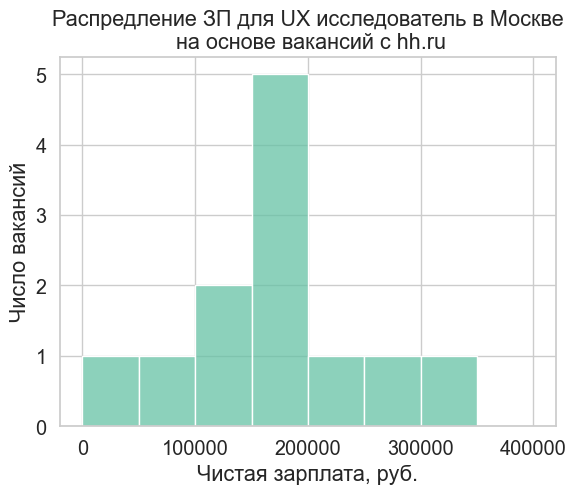

In [345]:
salary_hist = sns.histplot(salary_df['approximate_salary'], binrange=(0, 400000), bins=8)
salary_hist.set(xlabel='Чистая зарплата, руб.', ylabel='Число вакансий', title='Распредление ЗП для UX исследователь в Москве\n на основе вакансий с hh.ru')
plt.show()

**Выводы**:
* Всего вакансий 150.
* Топ-5 важных навыков: UX, UI, Figma, CJM.
* Слишком мало данных для составления выводов о ЗП.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


Проаналируем вакансии по Data Science.

In [10]:
vacancies_info_df.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,88044631,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Java-разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 80000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/88044631,[],[],[],False,[]
1,87879879,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],CEO,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 300000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/87879879,[],[],[],False,[]
2,88168559,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Руководитель направления,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/88168559,[],[],[],False,[]
3,87215623,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Руководитель отдела продаж,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/87215623,[],[],[],False,[]
4,87681894,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Бухгалтер,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/87681894,[],[],[],False,[]


**Вопрос 1:** Какой опыт требуется для данной вакансии?

Посмотрим на возможные значения опыта:

In [18]:
experience_df = pd.DataFrame(vacancies_info_df['experience'].to_list())
experience_df['id'].unique()

array(['noExperience', 'between1And3', 'moreThan6', 'between3And6'],
      dtype=object)

Сделаем группировку по этим значениям:

In [38]:
aggr_experience = experience_df.groupby(by='name').count().set_axis(
    ['количество'],
    axis=1
).sort_values(by='количество', ascending=False).reset_index()
aggr_experience['процент вакансий'] = aggr_experience['количество'] * 100/ vacancies_info_df.shape[0]

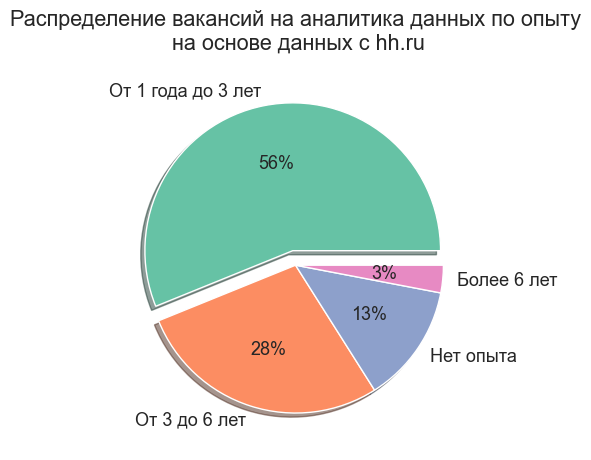

In [88]:
explode = (0.1, 0, 0, 0)  # Выделение определённых частей диаграммы
plt.pie(aggr_experience['количество'], labels=aggr_experience['name'], autopct='%1.0f%%', explode=explode, shadow=True, textprops={'size': 'small'})
plt.title('Распределение вакансий на аналитика данных по опыту\n на основе данных с hh.ru\n')
plt.show()

**Вопрос 2:** Какие работодатели в топе?

In [80]:
department_series = vacancies_info_df['department'].dropna()

department_cnt_dict = {}
for department in department_series:
    department_name = department['name']
    department_cnt_dict[department_name] = department_cnt_dict.get(department_name, 0) + 1

top15_departments = pd.DataFrame(
    department_cnt_dict.items(),
    columns=['deparment', 'vacancy_count']
).sort_values(by='vacancy_count', ascending=False).head(15)

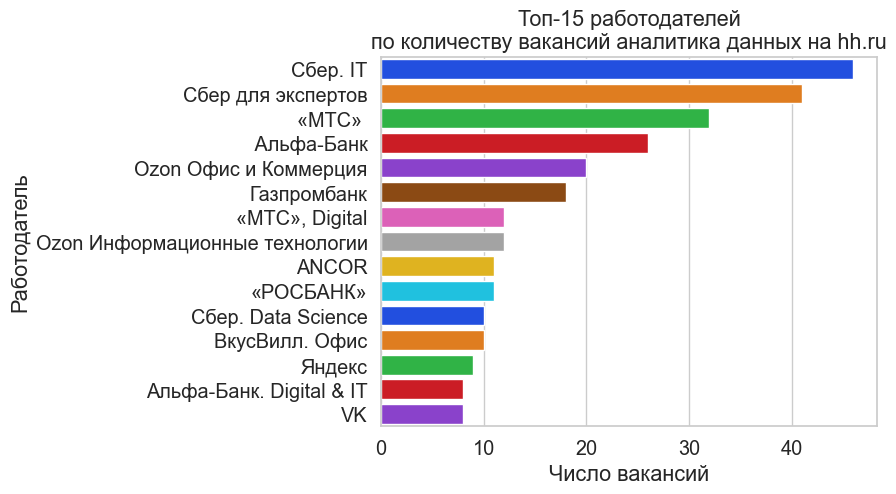

In [87]:
dep15_barplot = sns.barplot(top15_departments, x='vacancy_count', y='deparment', orient='h', palette='bright')
dep15_barplot.set(
    xlabel='Число вакансий',
    ylabel='Работодатель',
    title='Топ-15 работодателей\nпо количеству вакансий аналитика данных на hh.ru'
)
plt.show()

**Вопрос 3:** В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Посмотрим, как хранится адрес

In [91]:
vacancies_info_df['address'][1991]

{'city': 'Москва',
 'street': 'Верейская улица',
 'building': '29с134',
 'lat': 55.709444,
 'lng': 37.442302,
 'description': None,
 'raw': 'Москва, Верейская улица, 29с134',
 'metro': None,
 'metro_stations': []}

Нанесем все адреса на карту:

In [147]:
address_df = vacancies_info_df[['address', 'alternate_url']].dropna(subset=['address']).reset_index()

In [148]:
map = folium.Map(zoom_start = 10, tiles="Cartodb Positron", location=[55.7, 37.56])

address_list = []
for i in range(address_df.shape[0]):
    vacancy = address_df.iloc[i]
    lat = vacancy['address']['lat']
    long = vacancy['address']['lng']
    if vacancy['alternate_url'] is not None:
        job_url = vacancy['alternate_url']
    else:
        job_url = 'Нет ссылки'

    # где-то не указаны данные
    if (lat is None) or (long is None):
        address_df.drop([i])
        continue

    # где-то указаны координаты 0 0
    if (lat == 0) and (long == 0):
        address_df.drop([i])
        continue
    address_list.append({'lat': lat, 'lng': long, 'job_url': job_url})
    folium.CircleMarker(location=[lat, long], popup=job_url, radius = 5, fill_color='green', color='green', fill_opacity = 0.2).add_to(map)

better_address_df = pd.DataFrame(address_list)

map.save("Moscow_data_analyst_vacancy_map.html")
map

Опеределим рамки координат Москвы:

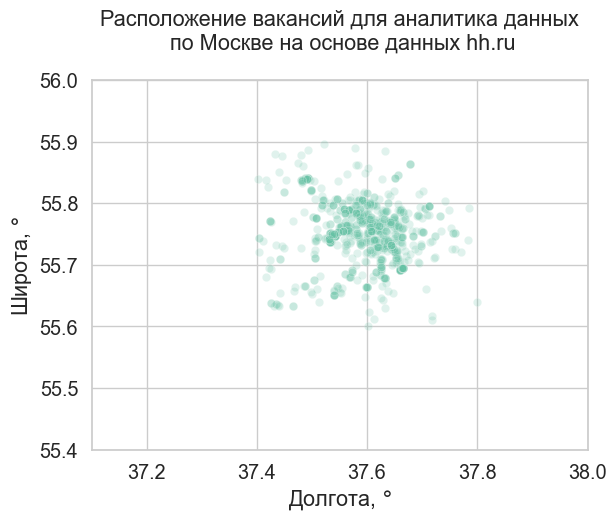

In [191]:
scatter = sns.scatterplot(better_address_df, x='lng', y='lat', alpha=0.2)
scatter.set_xlim(37.1, 38)
scatter.set_ylim(55.4, 56.0)
scatter.set(
    xlabel='Долгота, $\degree$',
    ylabel='Широта, $\degree$',
    title='Расположение вакансий для аналитика данных\n по Москве на основе данных hh.ru\n'
)
plt.show()

Отфильтруем данные по москвоским координатам

In [163]:
better_address_df = better_address_df[
    (better_address_df['lat'] >= 55.6) &
    (better_address_df['lat'] <= 55.9) &
    (better_address_df['lng'] >= 37.4) &
    (better_address_df['lng'] <= 37.8)
].reset_index()

Построим распределение количества вакансий по районам:

In [175]:
round_address_df = better_address_df.copy()
round_address_df['lat'] = round(better_address_df['lat'] * 4, 1) / 4
round_address_df['lng'] = round(better_address_df['lng'] * 4, 1) / 4

vacancy_dencity_table = pd.pivot_table(round_address_df, index='lat', columns='lng', aggfunc='count', values='job_url')

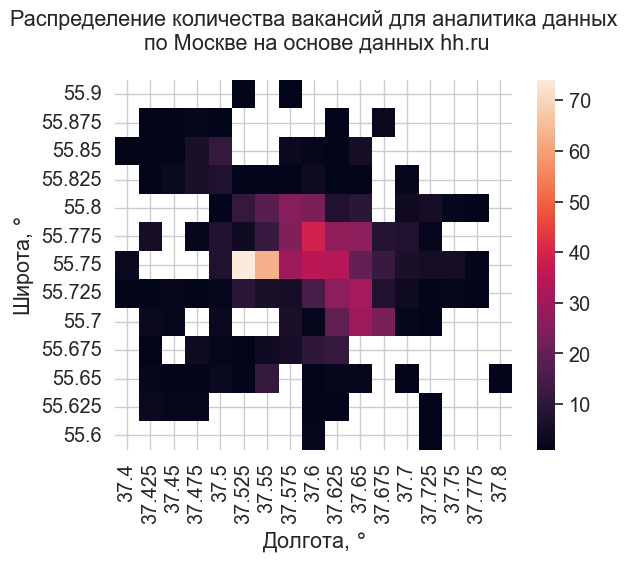

In [190]:
vacancy_cnt_map = sns.heatmap(vacancy_dencity_table)
vacancy_cnt_map.invert_yaxis()
vacancy_cnt_map.set(
    xlabel='Долгота, $\degree$',
    ylabel='Широта, $\degree$',
    title='Распределение количества вакансий для аналитика данных\n по Москве на основе данных hh.ru\n'
)
plt.show()

Какие выводы можно сделать из построенных графиков?

**Выводы:**
* Более половины вакансий на аналитика данных преднзанчены для работников со стажем от 1 до 3 лет. На треть должностей могут претендовать люди с опытом от 3 лет. Новичкам доступно только 13% вакансий.
* В топы работодателей по количеству вакансий входят известные IT-компнии: СБЕР, Яндекс, Ozon, VK, МТС. Также в лист входят такие банки, как РОСБАНК, Альфа-Банк.
* В центре Москвы высокая плотность вакансий, а по координатам (55.75, 37.525) находится район с самым большим их числом. Местоположение соответствует Москве-Сити. 